# EDA: CheXpert

In [79]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [80]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [81]:
capstone_path = os.getcwd() 
capstone_path

'/Users/joeai/Springboard/capstone_2'

In [82]:
data_path = capstone_path + '/data/CheXpert-v1.0-small/'
data_path

'/Users/joeai/Springboard/capstone_2/data/CheXpert-v1.0-small/'

In [83]:
data_path + 'train.csv'

'/Users/joeai/Springboard/capstone_2/data/CheXpert-v1.0-small/train.csv'

# Unzip CheXpert Data

In [84]:
%%time

#import zipfile
#zip_ref = zipfile.ZipFile(data_path + '/CheXpert-v1.0-small.zip', 'r')
#zip_ref.extractall(data_path)
#zip_ref.close()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


# Loading the Data

In [85]:
from pathlib import Path
path = Path(capstone_path)
path

PosixPath('/Users/joeai/Springboard/capstone_2')

In [86]:
train_df = pd.read_csv(path/'data/CheXpert-v1.0-small/train.csv')
valid_df = pd.read_csv(path/'data/CheXpert-v1.0-small/valid.csv')

In [87]:
train_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [88]:
valid_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
Path                          223414 non-null object
Sex                           223414 non-null object
Age                           223414 non-null int64
Frontal/Lateral               223414 non-null object
AP/PA                         191027 non-null object
No Finding                    22381 non-null float64
Enlarged Cardiomediastinum    44839 non-null float64
Cardiomegaly                  46203 non-null float64
Lung Opacity                  117778 non-null float64
Lung Lesion                   11944 non-null float64
Edema                         85956 non-null float64
Consolidation                 70622 non-null float64
Pneumonia                     27608 non-null float64
Atelectasis                   68443 non-null float64
Pneumothorax                  78934 non-null float64
Pleural Effusion              133211 non-null float64
Pleural Other                 6492 non-n

In [90]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
Path                          234 non-null object
Sex                           234 non-null object
Age                           234 non-null int64
Frontal/Lateral               234 non-null object
AP/PA                         202 non-null object
No Finding                    234 non-null float64
Enlarged Cardiomediastinum    234 non-null float64
Cardiomegaly                  234 non-null float64
Lung Opacity                  234 non-null float64
Lung Lesion                   234 non-null float64
Edema                         234 non-null float64
Consolidation                 234 non-null float64
Pneumonia                     234 non-null float64
Atelectasis                   234 non-null float64
Pneumothorax                  234 non-null float64
Pleural Effusion              234 non-null float64
Pleural Other                 234 non-null float64
Fracture                      234 

## Observations 

As we can see above, `train_df` has quite a few `NaN`s which isn't good. However, upon further investigation of Stanford's Machine Learning GitHub page, we can clarify that missing values mean that no mention of that particular pathology was extracted via the labeler. 

Stanford treated those cases as negative (i.e. `0`) when they created their own model. So we can begin by inputing `0` for these pathological columns.

In [91]:
# gather list of pathologies
pathology_list = list(train_df.columns[5:])

In [92]:
train_df[pathology_list] = train_df[pathology_list].fillna(0)

In [106]:
train_df[pathology_list] = train_df[pathology_list].astype(int)

In [107]:
train_df.isnull().sum() / len(train_df)

Path                          0.000000
Sex                           0.000000
Age                           0.000000
Frontal/Lateral               0.000000
AP/PA                         0.144964
No Finding                    0.000000
Enlarged Cardiomediastinum    0.000000
Cardiomegaly                  0.000000
Lung Opacity                  0.000000
Lung Lesion                   0.000000
Edema                         0.000000
Consolidation                 0.000000
Pneumonia                     0.000000
Atelectasis                   0.000000
Pneumothorax                  0.000000
Pleural Effusion              0.000000
Pleural Other                 0.000000
Fracture                      0.000000
Support Devices               0.000000
dtype: float64

## _Observations_

Looks like we're good to go...except for the `AP/PA` column. Let's take a look at what this column represents.

In [108]:
train_df['AP/PA'].head(10)

0     AP
1     AP
2     AP
3    NaN
4     AP
5     PA
6    NaN
7     PA
8    NaN
9     AP
Name: AP/PA, dtype: object

In [109]:
train_df['AP/PA'].value_counts()

AP    161590
PA     29420
LL        16
RL         1
Name: AP/PA, dtype: int64

In [110]:
train_df['AP/PA'].value_counts(normalize=True)

AP    0.845901
PA    0.154010
LL    0.000084
RL    0.000005
Name: AP/PA, dtype: float64

## What do `AP`, `PA` mean?

Simply put, it has to do with the positioning of the patient. 

`PA` stands for posterioranterior which is obtained when the patient is in a standing position, facing the cassette and the x-ray tube is approximately 72 inches away.

`AP` stands for anteriorposterior which is when the patient is lying down and the x-ray tube is only 40 inches from the patient. [(Source)](https://www.med-ed.virginia.edu/courses/rad/cxr/technique3chest.html)

It also looks like we have a very small number of observations that were labeled as either `LL` or `RL`. 

I'll have to do some further investigation into these particular labels...

However, since we'll be focus on labeling images, we won't have to worry too much about the unlabeled observations since we'll be feeding the images directly into the deep learning model. 

## _Focus: Sex & Age_

In [111]:
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex'].dtype

CategoricalDtype(categories=['Female', 'Male', 'Unknown'], ordered=False)

In [112]:
train_df['Sex'].value_counts()

Male       132636
Female      90777
Unknown         1
Name: Sex, dtype: int64

In [113]:
train_df['Sex'].value_counts(normalize=True)

Male       0.593678
Female     0.406317
Unknown    0.000004
Name: Sex, dtype: float64

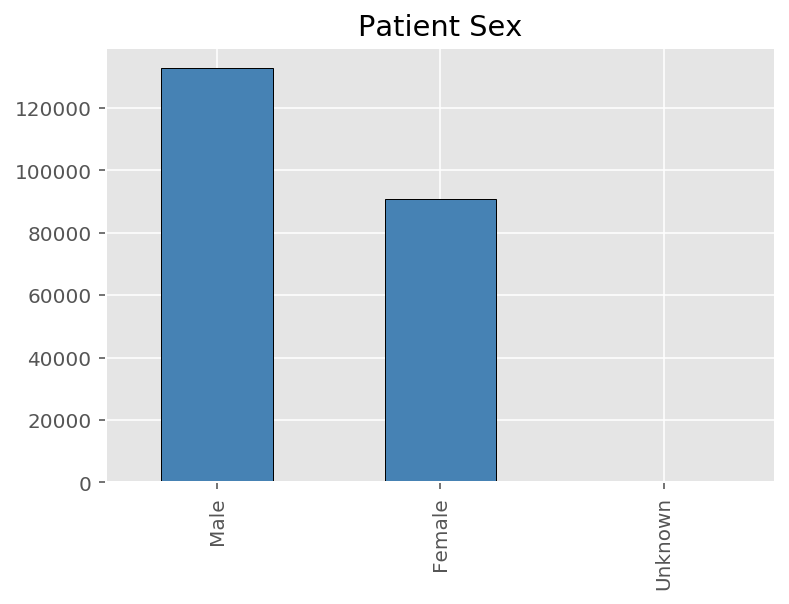

In [114]:
train_df['Sex'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Patient Sex');

count    223414.000000
mean         60.430653
std          17.820925
min           0.000000
25%          49.000000
50%          62.000000
75%          74.000000
max          90.000000
Name: Age, dtype: float64


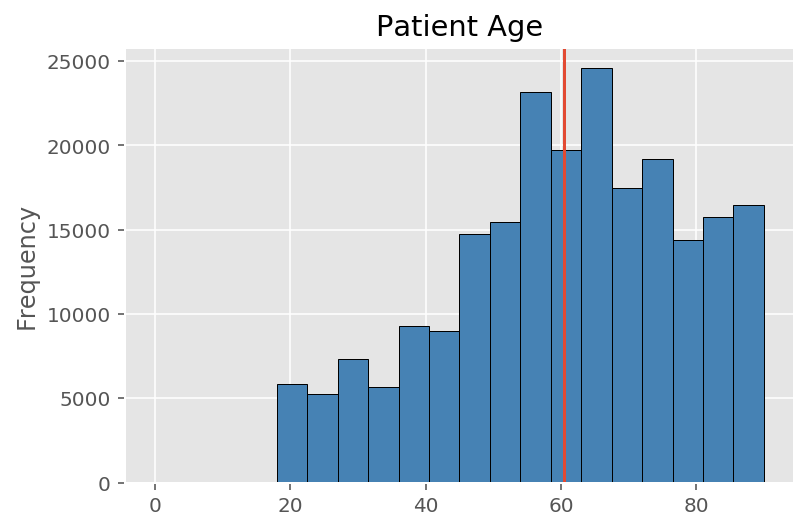

In [115]:
train_df['Age'].plot(kind='hist', color='steelblue', edgecolor='black', bins=20)
plt.axvline(x=np.mean(train_df['Age']))
plt.title('Patient Age')
print(train_df['Age'].describe());

## _Analyze Pathologies_

In [116]:
pathology_list.sort()
pathology_list

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'Lung Lesion',
 'Lung Opacity',
 'No Finding',
 'Pleural Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 'Support Devices']

In [117]:
for pathology in pathology_list:
    print(pathology)
    print('-' * 30)
    print(train_df[pathology].value_counts())
    print('')

Atelectasis
------------------------------
 0    156299
-1     33739
 1     33376
Name: Atelectasis, dtype: int64

Cardiomegaly
------------------------------
 0    188327
 1     27000
-1      8087
Name: Cardiomegaly, dtype: int64

Consolidation
------------------------------
 0    180889
-1     27742
 1     14783
Name: Consolidation, dtype: int64

Edema
------------------------------
 0    158184
 1     52246
-1     12984
Name: Edema, dtype: int64

Enlarged Cardiomediastinum
------------------------------
 0    200213
-1     12403
 1     10798
Name: Enlarged Cardiomediastinum, dtype: int64

Fracture
------------------------------
 0    213732
 1      9040
-1       642
Name: Fracture, dtype: int64

Lung Lesion
------------------------------
 0    212740
 1      9186
-1      1488
Name: Lung Lesion, dtype: int64

Lung Opacity
------------------------------
 0    112235
 1    105581
-1      5598
Name: Lung Opacity, dtype: int64

No Finding
------------------------------
0    201033
1     

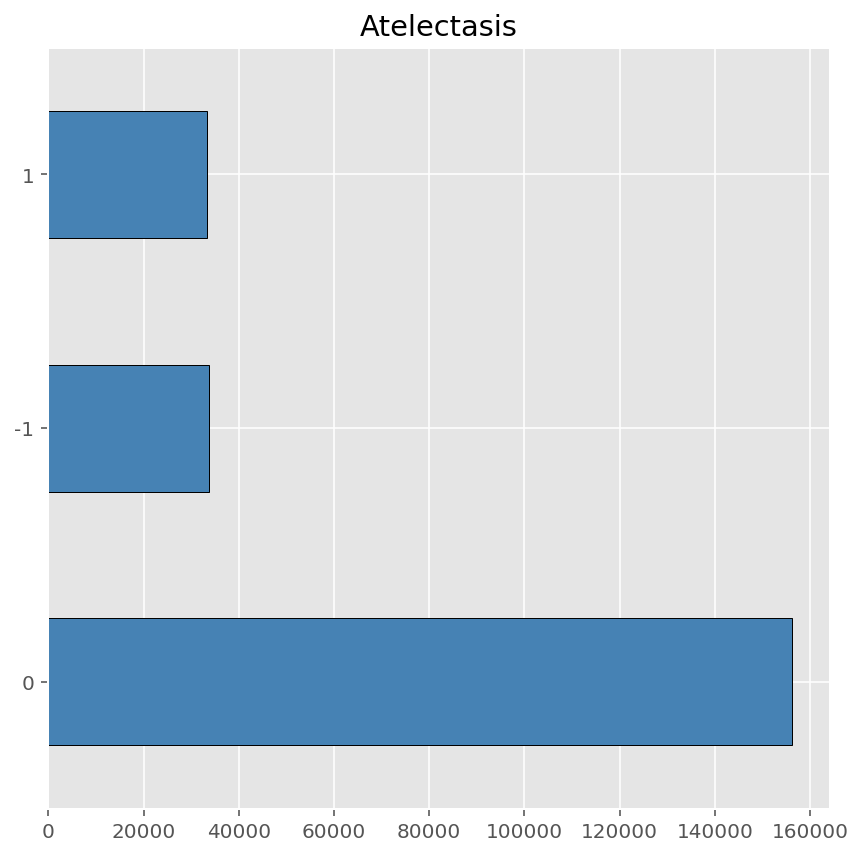

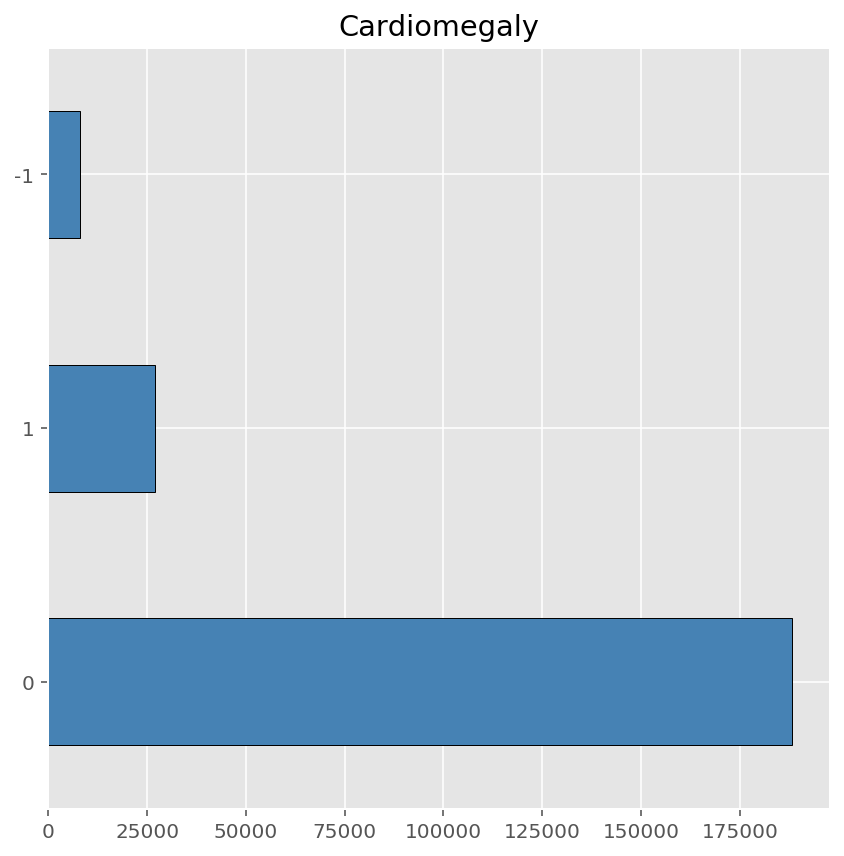

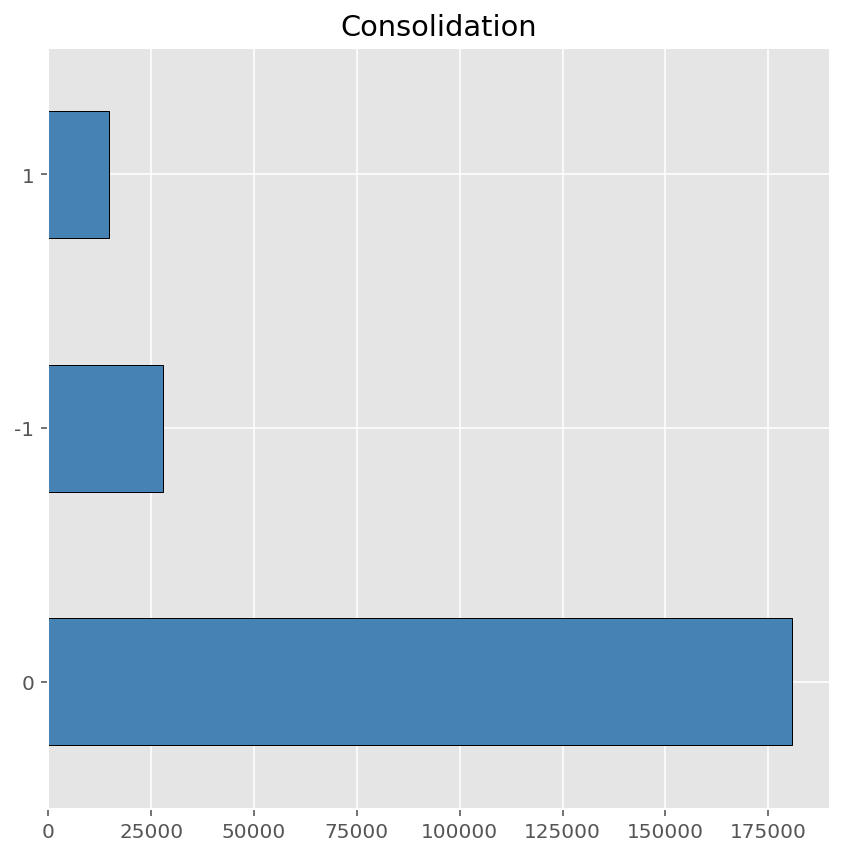

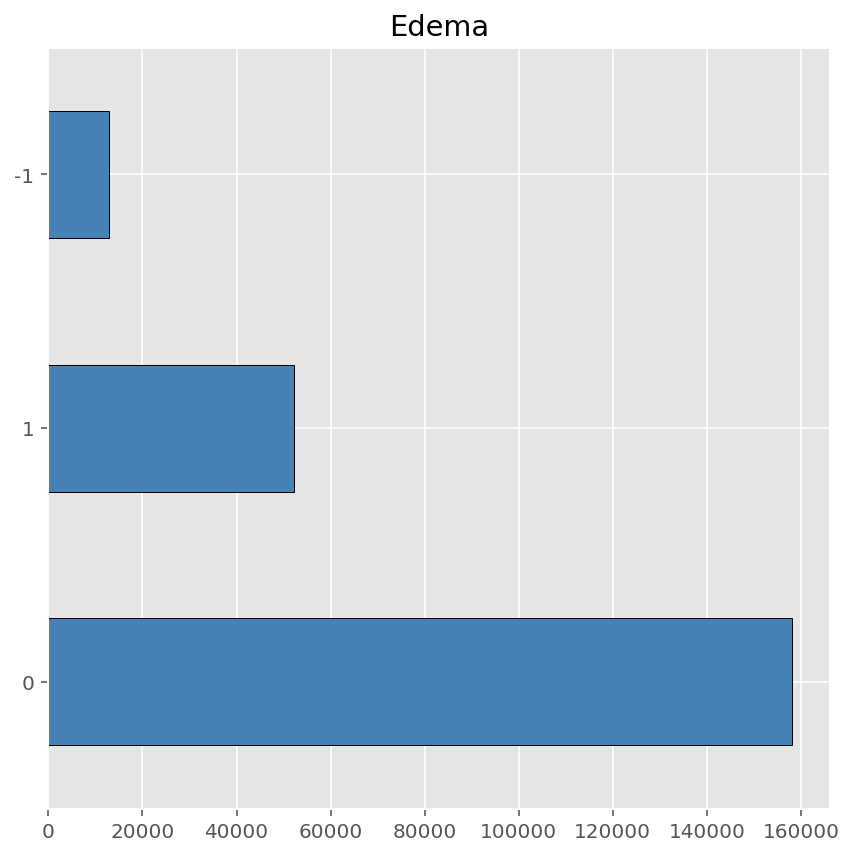

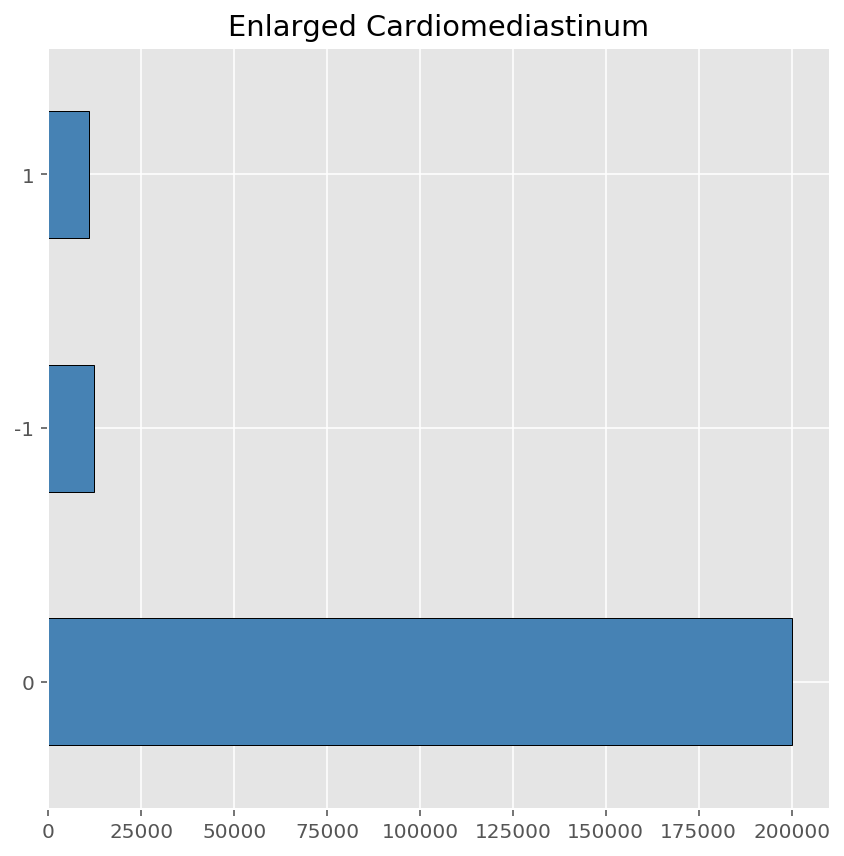

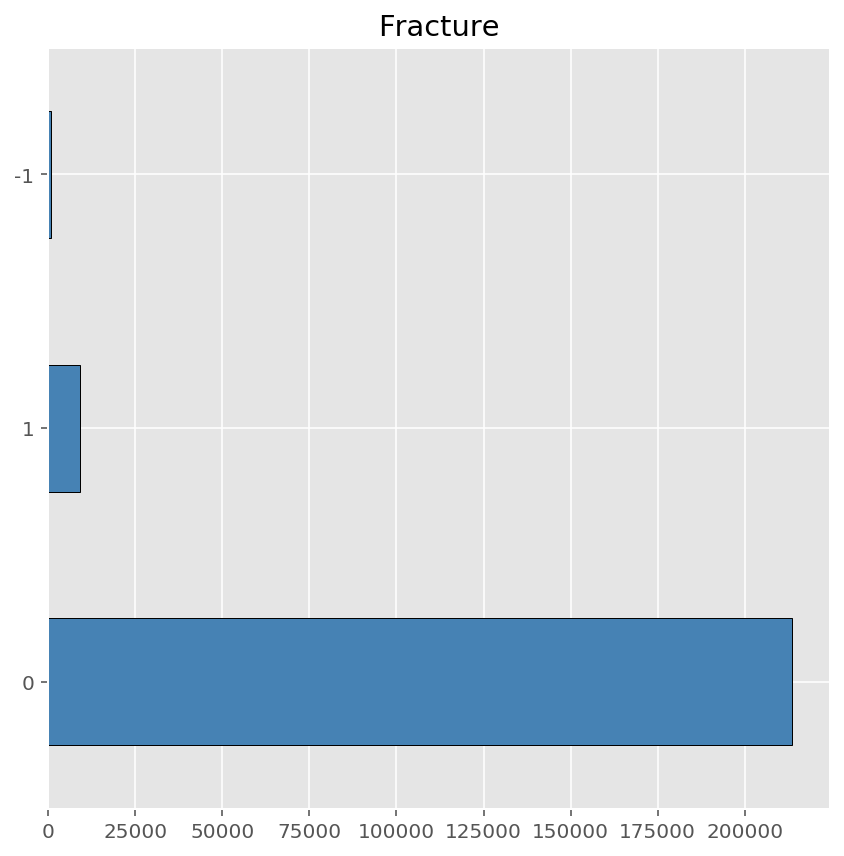

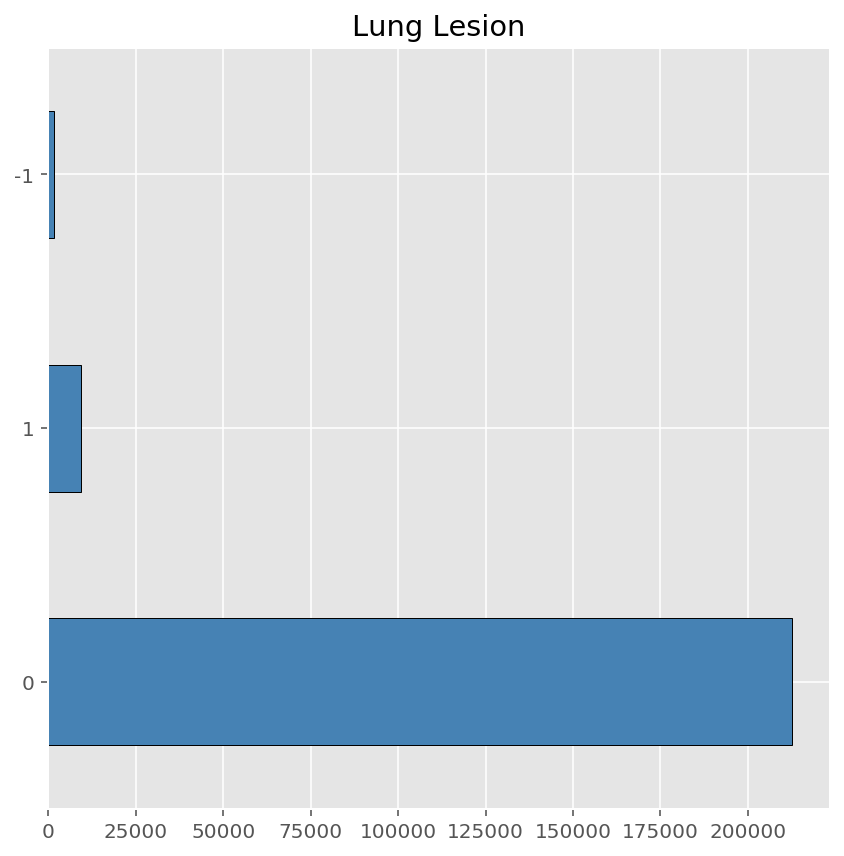

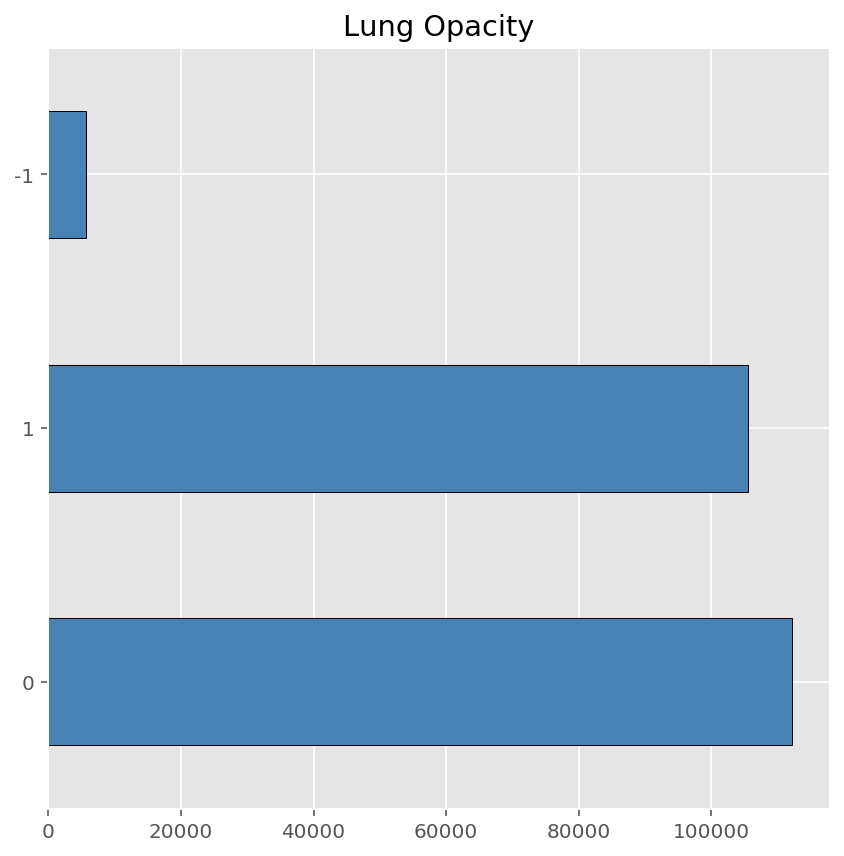

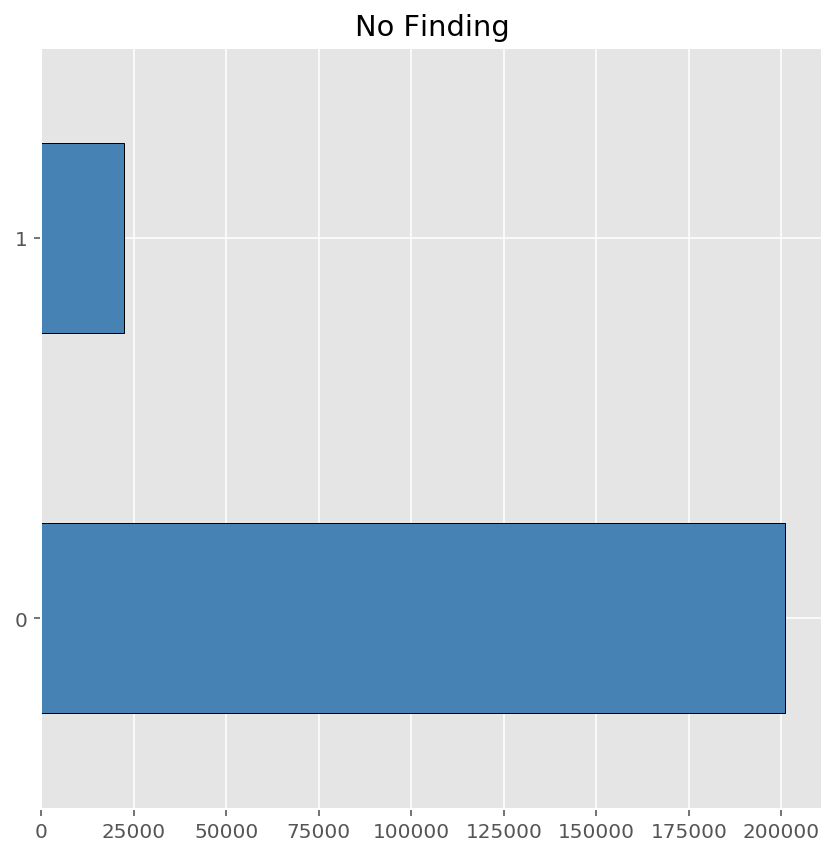

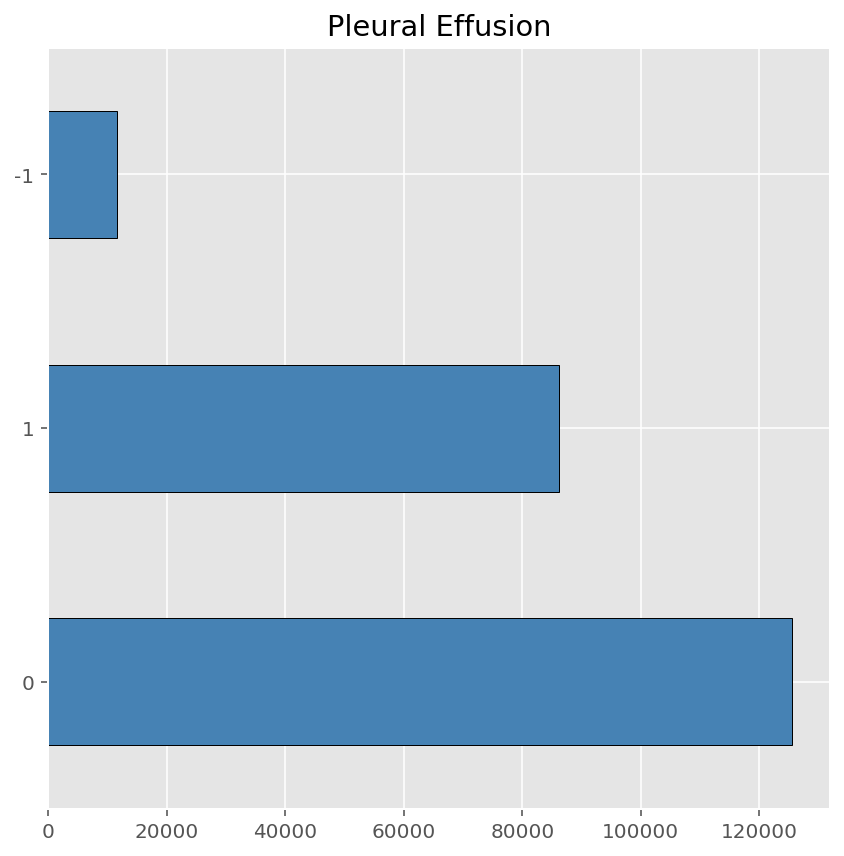

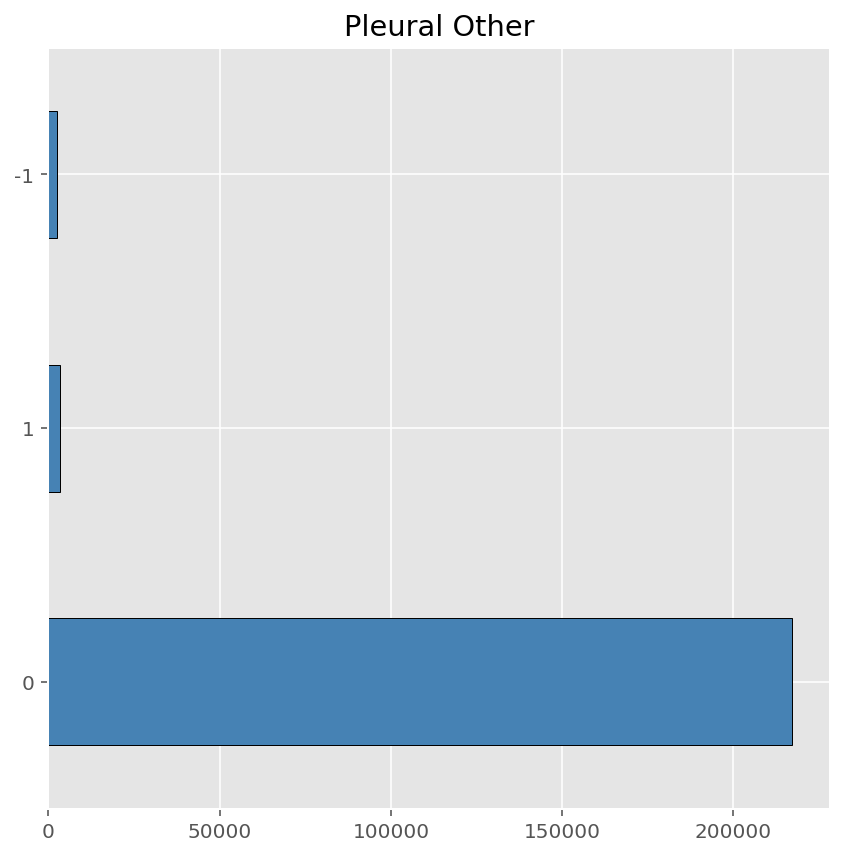

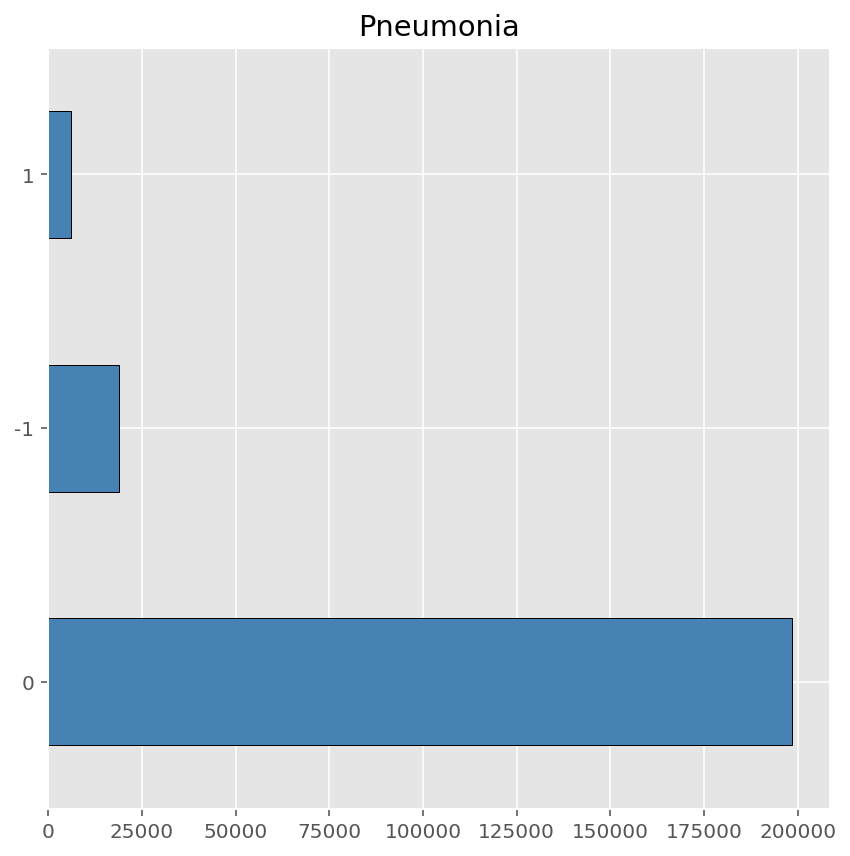

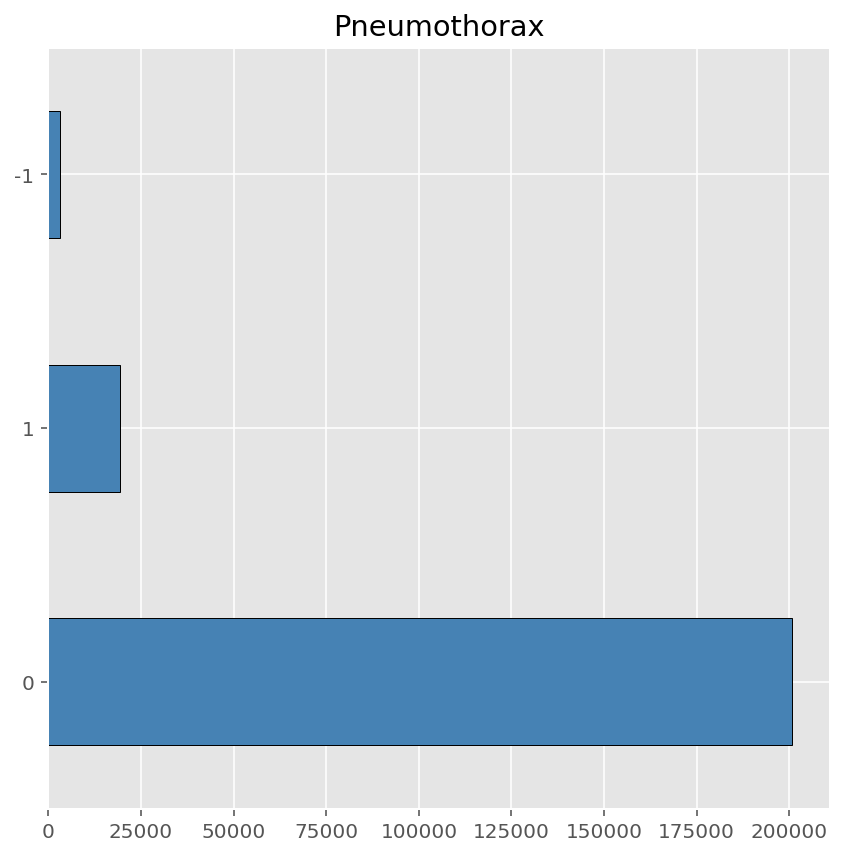

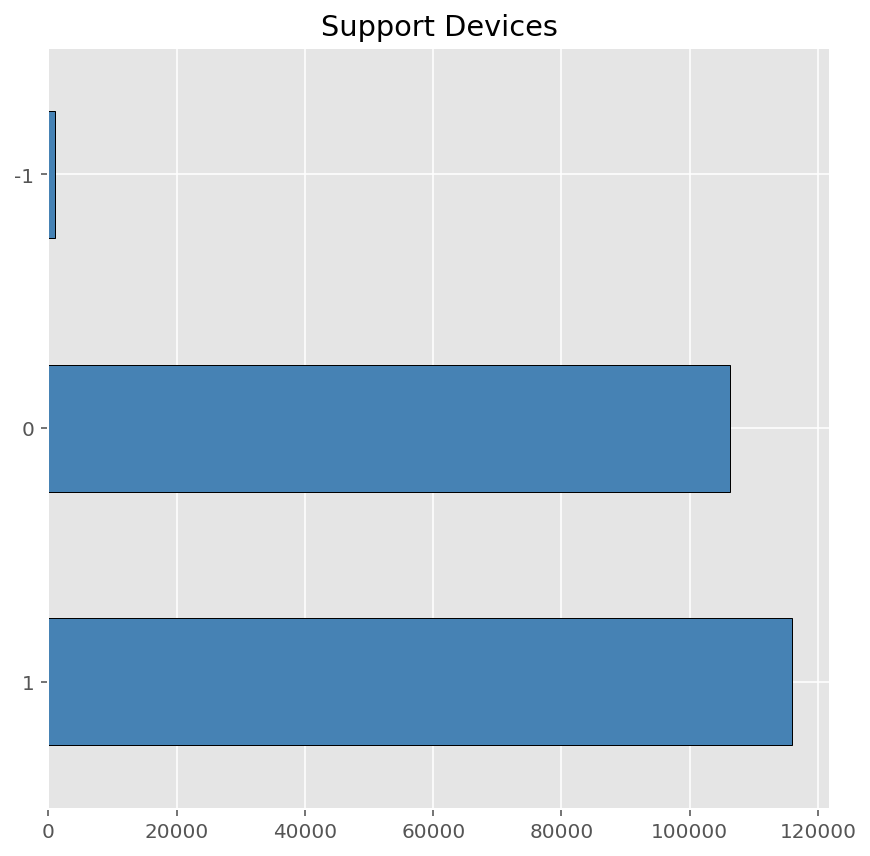

In [127]:
for path in pathology_list:
    plt.figure(figsize = (7,7))
    plt.title(path)
    plt.xticks()
    train_df[path].value_counts().plot(kind='barh', color='steelblue', edgecolor='black') 